In [3]:
## Data Wrangling

In [3]:
## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import tweepy

In [3]:
## Gather Data

In [4]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.920000e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.920000e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.920000e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [54]:
## Extracting tweet_id from url

In [5]:
df.tweet_id=df.expanded_urls.str.extract('(\d{18})')
df.tweet_id[0:5]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [56]:
## Downloading file using request library and url

In [6]:
response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
df2=pd.read_csv('image_prediction.tsv',delimiter='\t')

In [58]:
## Loading tweet_json file and appending data

In [7]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
'''
txt_file=open('tweet_json.txt','w')
#txt_file.write('tweet_id retweet_count favorite_count''\n')
for tweet_id in df1.tweet_id:
    try:
        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')
        retweet_count=tweet_info.retweet_count
        print(tweet_id)
        favorite_count=tweet_info.favorite_count
        txt_file.write(tweet_id+' '+str(retweet_count)+' '+str(favorite_count)+'\n')  
    except Exception as e:
        print('error')
txt_file.close()
'''
df3=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        df3=df3.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)

In [60]:
## Assess Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [9]:
df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [10]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df2.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 3 columns):
tweet_id          2186 non-null object
retweet_count     2186 non-null object
favorite_count    2186 non-null object
dtypes: object(3)
memory usage: 51.3+ KB


In [14]:
df3.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978


## Quality

- In df,the tweet_ID is not the right data type and value. some of the tweet_ID is missing.
- In df, we only want original ratings (no retweets).So the retweets shouldn't be there.
- We only want ratings with images. Not all ratings have images.
- In df, some ratings are wrong.
- In df, erroneous datatype for timestamp
- In df, nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
- In df, some dog names are not correct.
- In df2, some predictions are not dogs, there is no column for the most possible breed of a dog.


### Tidiness

- In df, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.
- in df, the columns 'doggo', 'floofer', 'pupper','puppo' show one variable.
- df3 should be part of df1.
- rating_numerator and denominator should be one variable rating.

In [68]:
## Clean Data

In [15]:
df1_clean = df.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

In [ ]:
## Issue

- In df1, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.

In [ ]:
## Define

- Delete 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

In [16]:
df1_clean=df1_clean[df.tweet_id.notnull()]
df1_clean=df1_clean[df.retweeted_status_id.isnull()]
df1_clean=df1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
## Test

In [17]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null object
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
doggo                    2023 non-null object
floofer                  2023 non-null object
pupper                   2023 non-null object
puppo                    2023 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 237.1+ KB


In [ ]:
## Issue

- One variable in four columns in df1. Nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.

In [ ]:
## Define

- Create column 'stage' to show dog stage, drop columns 'doggo','floofer','pupper','puppo'. Replace 'None' with np.nan.

In [ ]:
## Code

In [18]:
df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')
df1_clean['stage']=df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df1_clean.stage=df1_clean.stage.replace('',np.nan)

In [ ]:
## Test

In [19]:
df1_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [ ]:
## Issue

- df3 should be part of df1

In [ ]:
## Define

- Join df3 table to df1 table, joining on tweet_id.

In [ ]:
## Code

In [20]:
df3_clean=df3_clean[~(df3_clean.tweet_id.duplicated())]
df1_clean=pd.merge(df1_clean,df3_clean,on='tweet_id',how='left')
df1_clean[df1_clean.tweet_id=='887473957103951883']
missingcount_id=df1_clean.tweet_id[df1_clean.retweet_count.isnull()]

In [ ]:
## Test

In [21]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2022
Data columns (total 13 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null object
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
stage                    311 non-null object
retweet_count            2020 non-null object
favorite_count           2020 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 221.3+ KB


In [22]:
df1_clean.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8836,39455
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6475,33767
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4296,25427
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8915,42831


In [ ]:
## Issue

- In df, erroneous datatype for timestamp

In [ ]:
## Define 

- Convert timestamp to datetime data type.

In [ ]:
## Code

In [23]:
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)

In [24]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2022
Data columns (total 13 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null datetime64[ns, UTC]
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
stage                    311 non-null object
retweet_count            2020 non-null object
favorite_count           2020 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(8)
memory usage: 221.3+ KB


In [ ]:
## Issue

- Missing retweet_count and favorite_count for two oberservations

In [ ]:
## Define

- Gather Missing data from tweet API.

In [ ]:
df1_clean.loc[df1_clean.tweet_id==missingcount_id.iloc[0],['retweet_count','favorite_count']]=[tweet_info.retweet_count,tweet_info.favorite_count]
tweet_info2=api.get_status(missingcount_id.iloc[1],tweet_mode='extended')
df1_clean.loc[df1_clean.tweet_id==missingcount_id.iloc[1],['retweet_count','favorite_count']]=[tweet_info2.retweet_count,tweet_info2.favorite_count]

In [ ]:
## Test

In [26]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2022
Data columns (total 13 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null datetime64[ns, UTC]
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
stage                    311 non-null object
retweet_count            2020 non-null object
favorite_count           2020 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(8)
memory usage: 221.3+ KB


In [ ]:
## Issue 

- Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id

In [ ]:
## Define

- convert in_reply_to_status_id,in_reply_to_user_id to string data type. Query data from API

In [27]:
reply_id=df1_clean.tweet_id[df1_clean.in_reply_to_user_id.notnull()]
df1_clean.in_reply_to_user_id=df1_clean.in_reply_to_user_id.astype(str)
df1_clean.in_reply_to_status_id=df1_clean.in_reply_to_status_id.astype(str)
for each_id in reply_id:
    tweet_info=api.get_status(each_id,tweet_mode='extended')
    df1_clean.loc[df1_clean.tweet_id==each_id, 'in_reply_to_user_id']=str(tweet_info.in_reply_to_user_id)
    df1_clean.loc[df1_clean.tweet_id==each_id, 'in_reply_to_status_id']=str(tweet_info.in_reply_to_status_id)
df1_clean.in_reply_to_user_id=df1_clean.in_reply_to_user_id.replace('nan',np.nan)
df1_clean.in_reply_to_status_id=df1_clean.in_reply_to_status_id.replace('nan',np.nan)

TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]

In [ ]:
## Test

In [28]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2022
Data columns (total 13 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    2023 non-null object
in_reply_to_user_id      2023 non-null object
timestamp                2023 non-null datetime64[ns, UTC]
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
stage                    311 non-null object
retweet_count            2020 non-null object
favorite_count           2020 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(10)
memory usage: 221.3+ KB


In [31]:
df1_clean[df1_clean.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8836,39455
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6475,33767
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4296,25427
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8915,42831
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9708,40978
5,891087950875897856,nan,nan,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,3237,20538
6,890971913173991426,nan,nan,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,2140,12048
7,890729181411237888,nan,nan,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,19527,66584
8,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4396,28169
9,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7665,32446


In [ ]:
## Issue

- In df1, nulls represented as 'None' in columns 'name', some values are wrong in name. Names that varen't capitalized are wrong.

In [ ]:
## Define

- Set the value wrong names to 'None' and replace 'None' with np.nan.

In [ ]:
## Code

In [32]:
df1_clean.loc[df1_clean.name.str.islower(),'name']='None'
df1_clean.name=df1_clean.name.replace('None',np.nan)

In [ ]:
## Issue

- In df1, some ratings are wrong.
- Rating_numerator and denominator should be one variable rating.

In [ ]:
## Define

- Change the rating_numerator and rating_denominator for oberservations with wrong value
- Oberservations with tweet_id '810984652412424192' does not have a valid rating, so drop this row.
- Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.
- Drop oberservations with extreme ratings.

In [ ]:
## Code

In [33]:
pd.set_option('display.max_colwidth', -1)
df1_clean.loc[df1_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
340,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
403,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
686,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
825,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
873,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
917,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
952,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
973,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
998,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1016,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [34]:
df1_clean=df1_clean[df1_clean.tweet_id!='810984652412424192']
df1_clean.loc[df1_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df1_clean.loc[df1_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df1_clean.loc[df1_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df1_clean.loc[df1_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df1_clean.loc[df1_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


df1_clean['rating']=df1_clean.rating_numerator/df1_clean.rating_denominator
df1_clean=df1_clean.drop(['rating_numerator','rating_denominator'],axis=1)

df1_clean.loc[df1_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
525,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
575,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
750,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1403,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1747,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [ ]:
## Test

In [35]:
df1_clean.rating.sort_values()

249     0.0  
780     0.0  
1548    0.1  
2005    0.1  
1764    0.1  
1929    0.1  
1907    0.2  
1448    0.2  
1451    0.2  
1993    0.2  
2016    0.2  
1977    0.2  
1595    0.2  
1916    0.2  
1752    0.2  
1613    0.3  
1603    0.3  
1621    0.3  
1576    0.3  
576     0.3  
1516    0.3  
1909    0.3  
1972    0.3  
1855    0.3  
1809    0.3  
1384    0.3  
1873    0.3  
1049    0.3  
1135    0.3  
2001    0.3  
       ...   
171     1.4  
9       1.4  
269     1.4  
335     1.4  
95      1.4  
593     1.4  
32      1.4  
218     1.4  
153     1.4  
51      1.4  
126     1.4  
154     1.4  
330     1.4  
174     1.4  
1309    1.4  
294     1.4  
341     1.4  
811     1.4  
138     1.4  
21      1.4  
291     1.4  
120     1.4  
313     1.4  
476     1.4  
73      1.4  
1403    2.6  
575     2.7  
525     7.5  
1747    42.0 
750     177.6
Name: rating, Length: 2022, dtype: float64

In [ ]:
## Issue

- In df2, some predictions are not dogs, there is no column for the most possible breed of a dog and the confidence.

In [ ]:
## Define

- Create new columns predicted_breed and predicted_conf for the most possible breed of a dog and the confidence.

In [ ]:
## Code

In [36]:
df2_clean['predicted_breed']=df2_clean.p1
df2_clean.predicted_breed[df2_clean.p1_dog==False]=df2_clean.p2
df2_clean.predicted_breed[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)]= df2_clean.p3
df2_clean.predicted_breed[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)&(df2_clean.p3_dog==False)]='None' 
df2_clean.predicted_breed=df2_clean.predicted_breed.replace('None',np.nan)
df2_clean.predicted_breed[:10]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    Welsh_springer_spaniel
1    redbone               
2    German_shepherd       
3    Rhodesian_ridgeback   
4    miniature_pinscher    
5    Bernese_mountain_dog  
6    NaN                   
7    chow                  
8    golden_retriever      
9    miniature_poodle      
Name: predicted_breed, dtype: object

In [37]:
df2_clean['predicted_conf']=df2_clean.p1_conf
df2_clean.predicted_conf[df2_clean.p1_dog==False]=df2_clean.p2_conf
df2_clean.predicted_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)]= df2_clean.p3_conf
df2_clean.predicted_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)&(df2_clean.p3_dog==False)]=0 
df2_clean.predicted_conf=df2_clean.predicted_conf.replace(0,np.nan)
df2_clean.predicted_conf[:10]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    0.465074
1    0.506826
2    0.596461
3    0.408143
4    0.560311
5    0.651137
6   NaN      
7    0.692517
8    0.007959
9    0.201493
Name: predicted_conf, dtype: float64

In [ ]:
## Test

In [38]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 0 to 2022
Data columns (total 12 columns):
tweet_id                 2022 non-null object
in_reply_to_status_id    2022 non-null object
in_reply_to_user_id      2022 non-null object
timestamp                2022 non-null datetime64[ns, UTC]
source                   2022 non-null object
text                     2022 non-null object
expanded_urls            2022 non-null object
name                     1349 non-null object
stage                    311 non-null object
retweet_count            2019 non-null object
favorite_count           2019 non-null object
rating                   2022 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), object(10)
memory usage: 205.4+ KB


In [39]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id           2075 non-null int64
jpg_url            2075 non-null object
img_num            2075 non-null int64
p1                 2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
p2                 2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
p3                 2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
predicted_breed    1751 non-null object
predicted_conf     1751 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [ ]:
## Store Data

Store the clean DataFrame df1_clean in a CSV file named twitter_archive_master.csv and df2_clean in additional file 'twitter_image_predictions.csv'.- 

In [ ]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)
df2_clean.to_csv('twitter_image_predictions.csv', index=False)

In [88]:
## Analyze and Visualizen Data

In [41]:
df1_clean.describe()

,rating
count,2022.000000
mean,1.170772
std,4.038419
min,0.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,177.600000


In [42]:
df1_clean.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,retweet_count,favorite_count,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,8836,39455,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,6475,33767,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,4296,25427,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,8915,42831,1.3


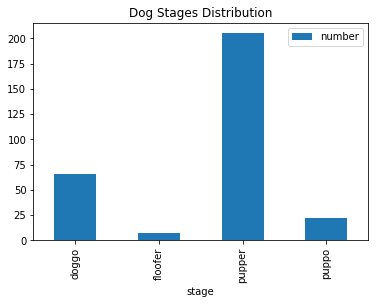

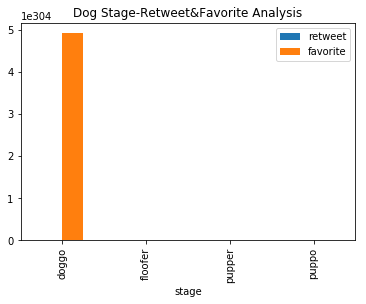

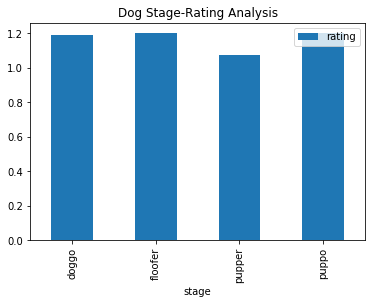

In [43]:
stage_analyze=pd.DataFrame(columns=['stage','number','rating','retweet','favorite'])
stage_analyze['stage']=['doggo','floofer','pupper','puppo']
for each_stage in stage_analyze.stage:
    stage_df=df1_clean[df1_clean.stage==each_stage]
    stage_analyze.loc[stage_analyze.stage== each_stage,'number']=stage_df.shape[0]
    stage_analyze.loc[stage_analyze.stage== each_stage,'rating']=stage_df['rating'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'retweet']=stage_df['retweet_count'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'favorite']=stage_df['favorite_count'].mean()
stage_analyze[['stage','number']].plot(x='stage',kind='bar',title='Dog Stages Distribution')
stage_analyze[['stage','retweet','favorite']].plot(x='stage',kind='bar',title='Dog Stage-Retweet&Favorite Analysis')
stage_analyze[['stage','rating']].plot(x='stage',kind='bar',title='Dog Stage-Rating Analysis')

In [ ]:
## Plotting a horizontal bar chart for top 10 dog names

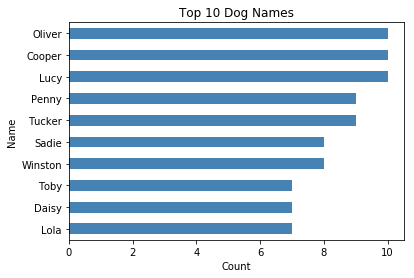

In [44]:
top_names = df1_clean.name.value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 Dog Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.savefig('top-names.png');

In [45]:
df1_clean.name.value_counts().sort_values(ascending= False)

Charlie         11
Lucy            10
Cooper          10
Oliver          10
Tucker          9 
Penny           9 
Winston         8 
Sadie           8 
Toby            7 
Daisy           7 
Lola            7 
Bella           6 
Jax             6 
Koda            6 
Bo              6 
Stanley         6 
Milo            5 
Leo             5 
Dave            5 
Buddy           5 
Rusty           5 
Louis           5 
Oscar           5 
Bailey          5 
Scout           5 
Chester         5 
Duke            4 
Jerry           4 
Clarence        4 
George          4 
               .. 
Scott           1 
Carper          1 
Apollo          1 
Zooey           1 
Lambeau         1 
Tiger           1 
Lorelei         1 
Sparky          1 
Chadrick        1 
Laela           1 
Siba            1 
Julius          1 
Brockly         1 
Berb            1 
Hubertson       1 
Kody            1 
Karma           1 
Cheesy          1 
Jennifur        1 
Emanuel         1 
Obi             1 
Striker     

In [ ]:
## Plotting a histogram for measuring the majority of the p1_conf entries

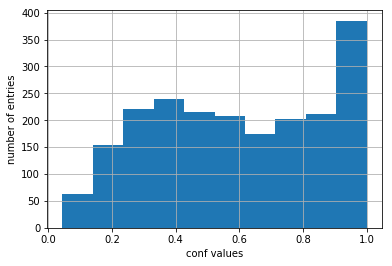

In [53]:
df2_clean['p1_conf'].hist()
plt.xlabel('conf values')
plt.ylabel('number of entries');

In [ ]:
## Plotting a histogram for measuring the majority of the p2_conf entries

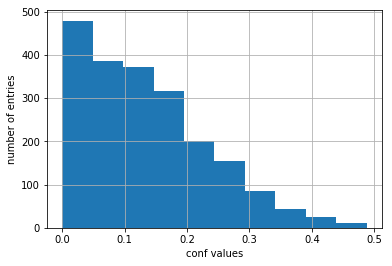

In [52]:
df2_clean['p2_conf'].hist()
plt.xlabel('conf values')
plt.ylabel('number of entries');

In [ ]:
## Plotting a histogram for measuring the majority of the p3_conf entries

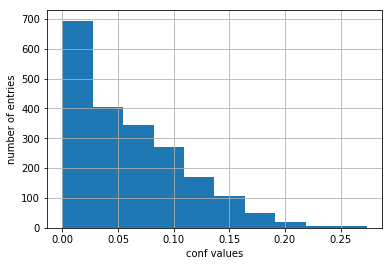

In [54]:
df2_clean['p3_conf'].hist()
plt.xlabel('conf values')
plt.ylabel('number of entries');